In [5]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/SHIELA4/BSIS2A_Felicitas-ShielaMaeB/refs/heads/main/StudentsPerformance1.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:

# Convert 'test preparation course' to numerical representation using one-hot encoding
X_simple = pd.get_dummies(df[['test preparation course']], drop_first=True)
# drop_first=True to avoid multicollinearity

# Define your target variable 'y'.
# Assuming 'math score' is the target, replace with your desired target column
y = df['writing score']

# Now, fit the model
simple_model = LinearRegression()
simple_model.fit(X_simple, y)

LinearRegression()

In [8]:
y_pred = simple_model.predict(X_simple)

In [9]:
# The explanatory variables: Independent Variable (Test Preparation Course)
df['test preparation course'] = df['test preparation course'].astype(str).map({'none': 0, 'completed': 1}).fillna(0).astype(int)

In [10]:
x = df[['test preparation course']] #independent variable
y = df['writing score'] #dependent variable

In [11]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [12]:
# Print the intercept and coefficient values after the model is trained
print(f"\nIntercept (β₀): {model.intercept_}")  # The intercept value, i.e., predicted math score when test preparation course = 0
print(f"Coefficient (β₁): {model.coef_[0]}")  # The coefficient of 'test preparation course' (effect on math score)


Intercept (β₀): 64.50467289719626
Coefficient (β₁): 9.914321516211563


In [13]:
# Predict math scores using the model
y_pred = model.predict(x)

In [14]:
print("Predicted writing score: ", y_pred)

Predicted writing score:  [64.5046729  74.41899441 64.5046729  64.5046729  64.5046729  64.5046729
 74.41899441 64.5046729  74.41899441 64.5046729  64.5046729  64.5046729
 64.5046729  74.41899441 64.5046729  64.5046729  64.5046729  64.5046729
 74.41899441 64.5046729  64.5046729  74.41899441 64.5046729  64.5046729
 74.41899441 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729
 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729  74.41899441
 64.5046729  64.5046729  74.41899441 64.5046729  64.5046729  64.5046729
 64.5046729  74.41899441 64.5046729  64.5046729  74.41899441 64.5046729
 74.41899441 74.41899441 64.5046729  74.41899441 64.5046729  64.5046729
 74.41899441 64.5046729  74.41899441 64.5046729  74.41899441 64.5046729
 74.41899441 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729
 64.5046729  64.5046729  64.5046729  64.5046729  74.41899441 74.41899441
 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729  74.41899441
 74.41899441 64.5046729  64.5046729

In [15]:
# Using statsmodels for p-values and summary (for statistical analysis)
X_with_const = sm.add_constant(x)  # Add a constant for the intercept term (which is necessary for OLS in statsmodels)
ols_model = sm.OLS(y, X_with_const).fit()  # Fit the OLS model using statsmodels

In [16]:
# Print summary (includes p-values, coefficients, R-squared, etc.)
print(f"Model Summary (using statsmodels): {ols_model.summary()}")  # Summary of statsmodels results

Model Summary (using statsmodels):                             OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     108.4
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           3.69e-24
Time:                        01:02:14   Log-Likelihood:                -4087.9
No. Observations:                1000   AIC:                             8180.
Df Residuals:                     998   BIC:                             8190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

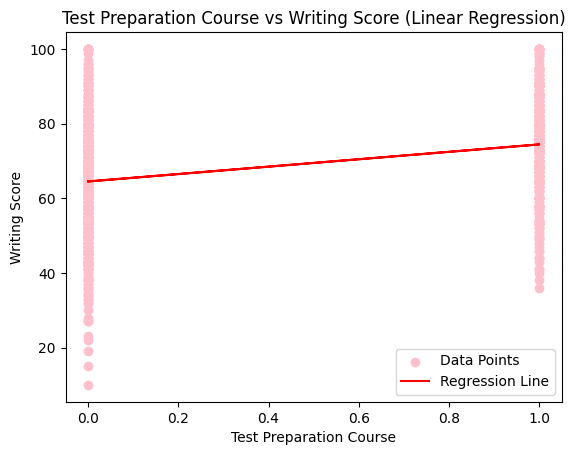

In [17]:
# Plotting the Regression Line and the Data Points
plt.scatter(x, y, color='pink', label='Data Points')  # Actual data points
plt.plot(x, y_pred, color='red', label='Regression Line')  # Regression line
plt.title("Test Preparation Course vs Writing Score (Linear Regression)")
plt.xlabel("Test Preparation Course")  # Label for X-axis
plt.ylabel("Writing Score")  # Label for Y-axis
plt.legend()  # Display legend for plot
plt.show()  # Show the plot

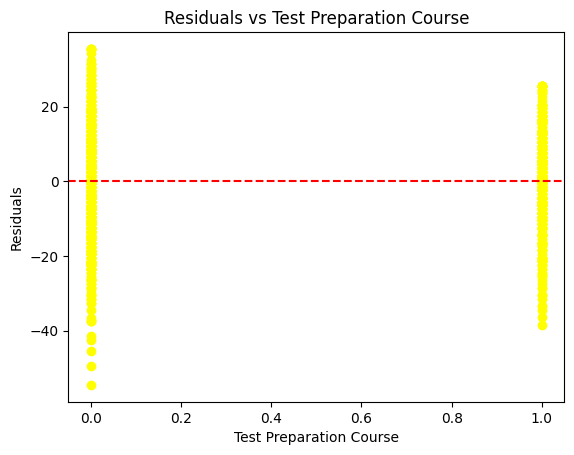

In [18]:
# Residuals Plot: Check for the residuals (actual - predicted values)
residuals = y - y_pred  # Calculate residuals
plt.scatter(x, residuals, color='yellow')  # Plot residuals
plt.axhline(0, color='red', linestyle='--')  # Red dashed line for residuals = 0
plt.title("Residuals vs Test Preparation Course")
plt.xlabel("Test Preparation Course")  # Label for X-axis
plt.ylabel("Residuals")  # Label for Y-axis
plt.show()  # Display residuals plot

In [19]:
# Maximum and minimum predicted Math Scores:
print(f"\nMaximum predicted Math Score: {y_pred.max()}")  # Highest predicted math score
print(f"Minimum predicted Math Score: {y_pred.min()}")  # Lowest predicted math score


Maximum predicted Math Score: 74.41899441340782
Minimum predicted Math Score: 64.50467289719626


In [20]:
# Assuming 'test preparation course' is your independent variable
X = df[['test preparation course']]

# Now you can add the constant
X = sm.add_constant(X)  # Add intercept

# Assuming 'math score' is your dependent variable, adjust if necessary
Y = df['writing score']

# Now fit the model
model = sm.OLS(Y, X).fit()  # Fit the model

In [21]:
print(model.summary())  # Displays regression results

                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     108.4
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           3.69e-24
Time:                        01:02:36   Log-Likelihood:                -4087.9
No. Observations:                1000   AIC:                             8180.
Df Residuals:                     998   BIC:                             8190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

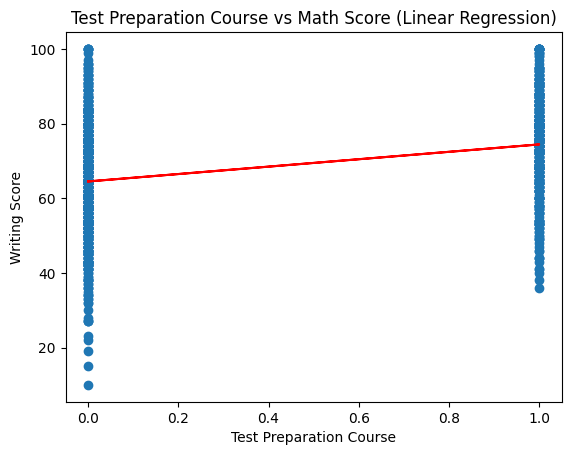

In [22]:
plt.scatter(X['test preparation course'], Y) # Select 'test preparation course' column from X
plt.plot(X['test preparation course'], model.predict(X), color='red')  # Regression line
plt.xlabel("Test Preparation Course") # Label for x-axis
plt.ylabel("Writing Score")  # Label for Y-axis
plt.title("Test Preparation Course vs Math Score (Linear Regression)")
plt.show()

In [23]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(dw)

2.010720085165608


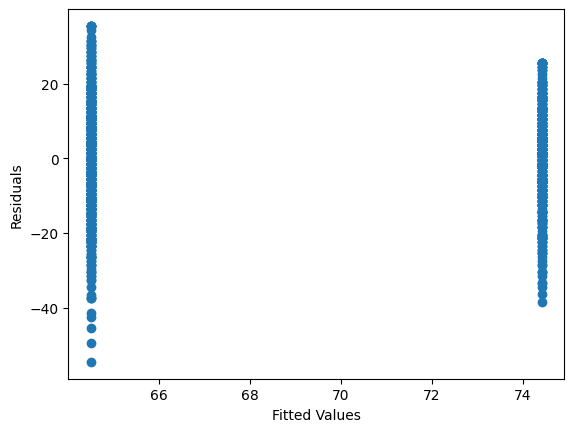

In [24]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [25]:
print(model.rsquared)  # R-squared value
print(model.rsquared_adj)  # Adjusted R-squared
print(model.fvalue)  # F-statistic value

0.0979353769735648
0.09703150460580279
108.3508916375644


In [26]:
print(model.pvalues)  # P-values for coefficients

const                      0.000000e+00
test preparation course    3.685292e-24
dtype: float64


In [27]:
print(model.conf_int())  # Confidence intervals for the coefficients

                                 0          1
const                    63.386360  65.622986
test preparation course   8.045267  11.783376
